## Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import scipy.stats as stats

In [2]:
antifungal = "Posaconazole"
molar_mass = 700.8
date = "2023-01-19"
organism = "Candida albicans"

## Import layout

In [3]:
#source_plate = '../growth_curve_files/plate.xlsx'
source_plate = r"plan_posa_prise1.xlsx"
plate_df = pd.read_excel(source_plate, header=0, index_col=0)
plate_df.head(3)

,strain,conc
well,,
C7,ERG11-DOX C.a,0.025
D7,ERG11-DOX C.a,0.025
C8,ERG11-DOX C.a,0.050


In [4]:
#importation of excel output from the TECAN
source_table1 = r"OD_posa_prise1.xlsx"
source_df = pd.read_excel(source_table1, header=0, index_col=0)
source_df.head()

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,163821s,164722s,165622s,166522s,167422s,168322s,169222s,170122s,171022s,171923s
E1,0.13125,0.13092,0.13103,0.13072,0.13128,0.13125,0.13140,0.13153,0.13185,0.13185,...,0.46110,0.46723,0.47255,0.47803,0.48360,0.49000,0.49682,0.50103,0.50820,0.51405
F1,0.13078,0.13150,0.13120,0.13125,0.13115,0.13128,0.13148,0.13198,0.13222,0.13248,...,0.48625,0.49330,0.50078,0.50765,0.51502,0.52202,0.53002,0.53802,0.54468,0.55332
E2,0.13088,0.13498,0.13455,0.13608,0.13755,0.13778,0.13775,0.13763,0.13815,0.13883,...,0.43068,0.43533,0.43910,0.44365,0.44915,0.45367,0.45673,0.46258,0.46783,0.47407
F2,0.12995,0.13080,0.13038,0.13030,0.13045,0.13040,0.13065,0.13080,0.13103,0.13122,...,0.39635,0.40053,0.40485,0.40925,0.41343,0.41797,0.42312,0.42805,0.43265,0.43863
E3,0.13008,0.13043,0.13013,0.13003,0.12993,0.13045,0.13023,0.13070,0.13083,0.13105,...,0.32245,0.32388,0.32622,0.32758,0.32932,0.33157,0.33405,0.33575,0.33827,0.34090


In [5]:
#conversion of timepoints (s) -> (h)
rename_dict = {}

for col_name in source_df.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
source_df.rename(columns = rename_dict, inplace=True)

source_df.head()

,0.000000,0.250000,0.500000,0.750000,1.000000,1.250278,1.500278,1.750278,2.000278,2.250278,...,45.505833,45.756111,46.006111,46.256111,46.506111,46.756111,47.006111,47.256111,47.506111,47.756389
E1,0.13125,0.13092,0.13103,0.13072,0.13128,0.13125,0.13140,0.13153,0.13185,0.13185,...,0.46110,0.46723,0.47255,0.47803,0.48360,0.49000,0.49682,0.50103,0.50820,0.51405
F1,0.13078,0.13150,0.13120,0.13125,0.13115,0.13128,0.13148,0.13198,0.13222,0.13248,...,0.48625,0.49330,0.50078,0.50765,0.51502,0.52202,0.53002,0.53802,0.54468,0.55332
E2,0.13088,0.13498,0.13455,0.13608,0.13755,0.13778,0.13775,0.13763,0.13815,0.13883,...,0.43068,0.43533,0.43910,0.44365,0.44915,0.45367,0.45673,0.46258,0.46783,0.47407
F2,0.12995,0.13080,0.13038,0.13030,0.13045,0.13040,0.13065,0.13080,0.13103,0.13122,...,0.39635,0.40053,0.40485,0.40925,0.41343,0.41797,0.42312,0.42805,0.43265,0.43863
E3,0.13008,0.13043,0.13013,0.13003,0.12993,0.13045,0.13023,0.13070,0.13083,0.13105,...,0.32245,0.32388,0.32622,0.32758,0.32932,0.33157,0.33405,0.33575,0.33827,0.34090


## Reshape (wide to long)

In [6]:
longdf = source_df.reset_index().rename(columns = {'index' : 'well'})
longdf = longdf.melt(id_vars = ['well'], var_name = 'time (h)', value_name = 'OD')
longdf

,well,time (h),OD
0,E1,0.0,0.13125
1,F1,0.0,0.13078
2,E2,0.0,0.13088
3,F2,0.0,0.12995
4,E3,0.0,0.13008
...,...,...,...
7291,D12,47.756389,0.82065
7292,E12,47.756389,0.25077
7293,F12,47.756389,0.24480
7294,G1,47.756389,1.18140


## Annotate dataframe with layout

In [7]:
merged_df = longdf.merge(right=plate_df, on=['well'])
merged_df.head(5)

,well,time (h),OD,strain,conc
0,E1,0.0,0.13125,ERG11-DOX C.a,0.25
1,E1,0.25,0.13092,ERG11-DOX C.a,0.25
2,E1,0.5,0.13103,ERG11-DOX C.a,0.25
3,E1,0.75,0.13072,ERG11-DOX C.a,0.25
4,E1,1.0,0.13128,ERG11-DOX C.a,0.25


## Visualization (example)

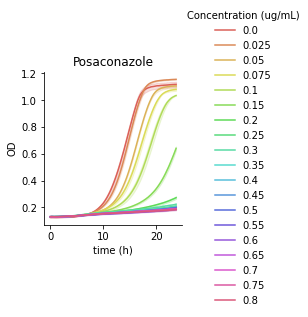

In [8]:
grid = sns.FacetGrid(data=merged_df[merged_df['time (h)'] <=24], hue='conc', palette='hls')
grid.map(sns.lineplot, 'time (h)', 'OD')
#grid.set_titles(col_template='{col_name}')
grid.set_axis_labels('time (h)', 'OD')
grid.add_legend(title = 'Concentration (ug/mL)')
grid.fig.subplots_adjust(top=0.9)
plt.title(antifungal)
axes = grid.axes.flatten()
title = "GC_" + antifungal + "_" + organism + "_" + date
plt.savefig(title, format='png', dpi=300)
#plt.savefig('../growth_curve_files/graphs/mica_40h.png', format='png', dpi=300)

## Calculate area under the curve (AUC)

In [8]:
def get_auc(g):
    return np.trapz(g.OD)

In [9]:
aucdf = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_auc).reset_index(name='auc')
condensed_df = plate_df.merge(right=aucdf, on=['well'])
condensed_df.head(3)

,well,strain,conc,auc
0,C7,ERG11-DOX C.a,0.025,52.380480
1,D7,ERG11-DOX C.a,0.025,51.011265
2,C8,ERG11-DOX C.a,0.050,44.162880


## Calculate derivative growth rate (DGR)

In [10]:
def get_derivative_growth_rate(g):
    # rate is multiplied by 4 to convert from /15min (measurements every 15 min) to /h
    data_diff = g.OD.diff()*4
    get_top_5 = data_diff.nlargest(5)    
    growth_rate = np.median(get_top_5)
    return growth_rate

In [11]:
dgr = merged_df[merged_df['time (h)'] <= 24].groupby('well')[['OD']].apply(func=get_derivative_growth_rate).reset_index(name='dgr')
condensed_df = plate_df.merge(right=dgr, on=['well'])
condensed_df.head(3)

,well,strain,conc,dgr
0,C7,ERG11-DOX C.a,0.025,0.15584
1,D7,ERG11-DOX C.a,0.025,0.15612
2,C8,ERG11-DOX C.a,0.050,0.14368


## Convert concentrations (ug/mL -> uM)

In [12]:
def convert_to_uM(ug, mass_mol):
    # a simple function to convert ug/ml to uM with the molecular weigth of the compound
    vol = 0.001
    uM = (((ug*10**-6)/(vol*mass_mol))*10**6)
    return uM

In [13]:

condensed_df['concentration_uM'] = condensed_df['conc'].apply(lambda x: convert_to_uM(x, molar_mass))
condensed_df

,well,strain,conc,dgr,concentration_uM
0,C7,ERG11-DOX C.a,0.025,0.15584,0.035674
1,D7,ERG11-DOX C.a,0.025,0.15612,0.035674
2,C8,ERG11-DOX C.a,0.050,0.14368,0.071347
3,D8,ERG11-DOX C.a,0.050,0.14612,0.071347
4,C9,ERG11-DOX C.a,0.075,0.13120,0.107021
5,D9,ERG11-DOX C.a,0.075,0.13268,0.107021
6,C10,ERG11-DOX C.a,0.100,0.12488,0.142694
7,D10,ERG11-DOX C.a,0.100,0.12720,0.142694
8,C11,ERG11-DOX C.a,0.150,0.09612,0.214041
9,D11,ERG11-DOX C.a,0.150,0.10012,0.214041


## Convert concentrations (uM -> ug/mL)

In [14]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

## Calculate inhibition coefficient

In [15]:
# Setting the value to be used to calculate the inhibition coefficient
# Either derivative growth rate (fitness_type = 'dgr')
# or normalized AUC parameter (fitness_type = 'norm_auc')
if 'dgr' in condensed_df.columns.tolist():
    fitness_type = 'dgr'
elif 'auc' in condensed_df.columns.tolist():
    fitness_type = 'norm_auc'
else:
    print('Fitness has not been calculated')

In [16]:
def get_inhib_coeff(df, fitness, fitness_type):
    # Inhibition coefficient is calculated either from the derivative growth rate (fitness_type = 'dgr')
    # or the normalized AUC parameter (fitness_type = 'norm_auc')
    ref = df.loc[(df.concentration_uM==0), 'dgr'].mean()
    return (ref - fitness)/ref

In [17]:
condensed_df['inhib_coeff'] = condensed_df['dgr'].apply(lambda x: get_inhib_coeff(condensed_df, x, 'dgr'))
condensed_df.head(3)

,well,strain,conc,dgr,concentration_uM,inhib_coeff
0,C7,ERG11-DOX C.a,0.025,0.15584,0.035674,-0.042129
1,D7,ERG11-DOX C.a,0.025,0.15612,0.035674,-0.044002
2,C8,ERG11-DOX C.a,0.050,0.14368,0.071347,0.039187


## Hill equation + fitting

In [18]:
#fit_data = condensed_df[(condensed_df.strain=='LL13-040') & (condensed_df.genotype=='WT') & (condensed_df.concentration_uM!=0) & (condensed_df.concentration_uM<50)][['concentration_uM','replicate','inhib_coeff']]
fit_data = condensed_df[(condensed_df.concentration_uM!=0)].groupby(['concentration_uM'])[['inhib_coeff']].mean().reset_index()
fit_data

,concentration_uM,inhib_coeff
0,0.035674,-0.043065
1,0.071347,0.031028
2,0.107021,0.117694
3,0.142694,0.157149
4,0.214041,0.343854
5,0.285388,0.882707
6,0.356735,0.958272
7,0.428082,0.923365
8,0.499429,0.960278
9,0.570776,0.956935


In [19]:
wt_conc = fit_data.concentration_uM.values
wt_inhib = fit_data.inhib_coeff.values

In [20]:
print(wt_conc)
print(wt_inhib)

[0.03567352 0.07134703 0.10702055 0.14269406 0.2140411  0.28538813
 0.35673516 0.42808219 0.49942922 0.57077626 0.64212329 0.71347032
 0.78481735 0.85616438 0.92751142 0.99885845 1.07020548 1.14155251]
[-0.0430654   0.03102849  0.11769426  0.15714859  0.34385449  0.88270697
  0.95827203  0.92336499  0.96027819  0.9569346   0.96188311  0.95987696
  0.96776782  0.96683162  0.96857028  0.96602916  0.96643039  0.97365253]


In [21]:
def hill_equation(x, E, n):
    # this function defines the hill equation, where:
    # x is the drug concentration
    # E is the concentration with half effect (IC50)
    # n is the hill coefficient,
    
    return 1/(1+((E/x)**n))

In [22]:
import scipy as sci

# Get best fit parameters (popt) and covariance matrix (pcov)
popt, pcov = sci.optimize.curve_fit(hill_equation, wt_conc, wt_inhib, p0=[0.5,4])
print(popt)
print(pcov)

[0.22491793 5.69668798]
[[5.33275099e-05 1.27253278e-03]
 [1.27253278e-03 8.56615864e-01]]


In [23]:
def get_IC(v, E, n):
    # This function calculates ICv based on IC50 (E) and hill coefficient (n) for any v value between 0 and 1
    return E*((v/(1-v))**(1/n))

In [24]:
ic50_mol = round(get_IC(0.5,popt[0],popt[1]),2)
#This value should be equal to popt[0]
print('IC50 = {} uM'.format(ic50_mol))
ic75_mol = round(get_IC(0.75,popt[0],popt[1]),2)
print('IC75 = {} uM'.format(ic75_mol))

IC50 = 0.22 uM
IC75 = 0.27 uM


In [25]:
def convert_to_ug(uM, mass_mol):
    # a simple function to convert uM to ug/ml with the molecular weigth of the compound
    ug = (uM*mass_mol)/1000
    return ug

In [26]:
ic50 = convert_to_ug(ic50_mol, molar_mass)
ic50

0.15417599999999998

In [32]:
def get_IC_from_ug(ug, E, n):
    # This function calculates IC based on ug of antifungal
    
    x = (ug*1000)/molar_mass
    return 1/(1+((E/x)**n))

In [36]:
round(get_IC_from_ug(0.154,popt[0],popt[1]),3)

0.467

In [27]:
dof = np.size(wt_inhib) - 1 # degrees of freedom:
# calculate student-t value
a = 0.05 #(1-0.95, 95% CI)
tval = stats.t.ppf(1.0-a/2, dof)
ci_cy = tval*np.sqrt(pcov)[0]
# this little snippet of code allows to calculate the 95% confidence interval on both parameters.
# based on this, we would have IC50 = 9.26 uM +/- 1.18 and hill_coeff = 0.749 +/- 0.019

ci_cy

array([0.01540707, 0.07526256])

In [28]:
interval = convert_to_ug(ci_cy[0], molar_mass)
interval

0.010797276932248115

In [29]:
# now we'll want to plot our curve on top of the data. However, since we'll be plotting on both linear and log
# axis, we need to choose x coordinates across our range of concentrations that are not log-distributed and not 
# linearly distributed
fit_vals = np.logspace(np.log2(wt_conc.min()),np.log2(wt_conc.max()), num=50, base=2)

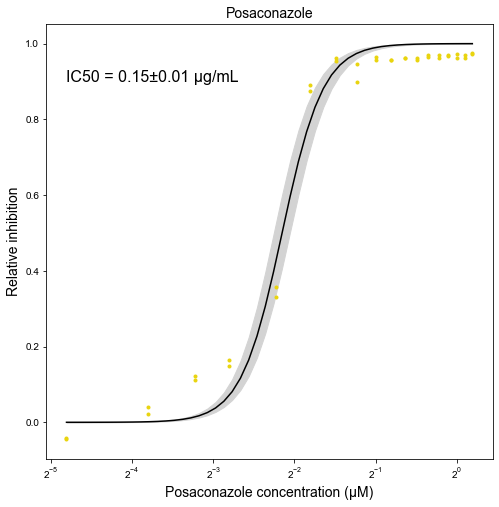

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(8,8))


plt.plot(condensed_df['concentration_uM'],condensed_df['inhib_coeff'], color='#E9D40D', 
         marker='o', ms=3, linestyle='None', zorder=9)

plt.plot(fit_vals, [hill_equation(x,popt[0], popt[1]) for x in fit_vals], 'k')


plt.fill_between(fit_vals, [hill_equation(x,popt[0]+ci_cy[0], popt[1]-ci_cy[1]) for x in fit_vals],
                 [hill_equation(x,popt[0]-ci_cy[0], popt[1]+ci_cy[1]) for x in fit_vals], color='lightgrey')

plt.xscale('log',base=2)

text = "IC50 = " + str(round(ic50,2)) + "\u00B1" + str(round(interval,2)) +" μg/mL"
#text = "\nou " + str(round(ic50_mol,2)) + "\u00B1" + str(round(ci_cy[0],2)) + " $\mu$M\n" + "\nCoefficient de Hill = " + str(round(popt[1],2)) + "\u00B1" + str(round(ci_cy[1],2))+ "\n\nBasé sur le\ntaux de croissance dérivé\naprès 24h"
plt.text(wt_conc.min(), 0.9, text, fontsize=16) 

plt.xlabel(antifungal + " concentration (μM)", fontsize=14)
plt.ylabel('Relative inhibition', fontsize=14)
plt.title(antifungal, fontsize=14)

plt.rcParams['svg.fonttype'] = 'none'
name = "Dose-response_curve_" + antifungal + "_"+ organism + "24H" + "_" + date
plt.savefig(f"c:{name}.png", format='png', dpi=300)
plt.savefig(f"c:{name}.svg", format='svg', dpi=300)